# 神经网络层可视化

In [7]:
import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo
import torchvision.models as models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_urls = {
    'alexnet': r'https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth',
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}

## AlexNet
### 建立模型下载参数

In [3]:
alexnet_model = models.alexnet(pretrained=True)
print(alexnet_model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

**加载方式一直出错，待解决**

In [ ]:
alexnet_model.load_state_dict(torch.load(r'F:\DeepLearning\Pytorch\models_param\alexnet-owt-4df8aa71.pth'))

In [54]:
from torch.utils.model_zoo import load_url as load_state_dict_from_url
state_dict=load_state_dict_from_url(model_urls['alexnet'],progress=True)
#alexnet_model.load_state_dict(model_zoo.load_url(model_urls['alexnet']))
alexnet_model.load_state_dict(state_dict)

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

### 第一层参数可视化

In [6]:
for name,module in alexnet_model.named_children():
    print(name)

features
avgpool
classifier


In [5]:
modules = dict(alexnet_model.named_children())
layer0 = modules['features'][0]
layer0_weight = layer0.weight.data
print(layer0_weight.size())

torch.Size([64, 3, 11, 11])


In [10]:
type(layer0_weight)

torch.Tensor

In [18]:
layer0_weight[0,0,:]

tensor([[ 0.1186,  0.0941,  0.0954,  0.1052,  0.1029,  0.0672,  0.0505,  0.0501,
          0.0558,  0.0216,  0.0500],
        [ 0.0749,  0.0389,  0.0530,  0.0760,  0.0723,  0.0729,  0.0520,  0.0271,
          0.0257, -0.0113,  0.0042],
        [ 0.0754,  0.0388,  0.0549,  0.0558,  0.0525,  0.0500,  0.0476,  0.0253,
          0.0436,  0.0102,  0.0133],
        [ 0.0704,  0.0525,  0.0631,  0.0622,  0.0589,  0.0386,  0.0450,  0.0381,
          0.0458,  0.0019,  0.0030],
        [ 0.0873,  0.0750,  0.0716,  0.0834,  0.0946,  0.0654,  0.0335,  0.0210,
          0.0221, -0.0106, -0.0343],
        [ 0.0958,  0.0992,  0.1006,  0.1088,  0.0726,  0.0361, -0.0075, -0.0431,
         -0.0379, -0.0568, -0.0560],
        [ 0.1150,  0.1155,  0.1071,  0.0915,  0.0029, -0.0900, -0.1133, -0.1391,
         -0.1248, -0.0845, -0.0745],
        [ 0.0955,  0.1103,  0.0825,  0.0421, -0.0594, -0.1595, -0.1237, -0.1581,
         -0.1643, -0.1153, -0.0928],
        [ 0.0932,  0.1037,  0.0675,  0.0244, -0.0697, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


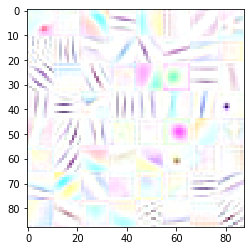

In [19]:
weight_size = 11
layer0_image = np.zeros((weight_size*8,weight_size*8,3))
for i in range(8):
    for j in range(8):
        w_np = layer0_weight[i*8+j,:,:,:].permute(1,2,0)
        layer0_image[i*weight_size:(i+1)*weight_size,j*weight_size:(j+1)*weight_size] = 1.0-w_np.numpy()
        
plt.imshow(layer0_image)

In [5]:
for name,module in alexnet.named_children():
    print(name)
    print(module)

features
Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)
avgpool
AdaptiveAvgPool2d(output_size=(6, 6))
classifier
Sequential(
  (0): Dropout(p=0.5)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace)
  (3): Dropout(p=0.5)
  (4): Linear(in_features=4096, out_features=4096, bia

### 可视化第一层网络参数

## VGGNet

In [3]:
vgg16 = models.vgg16()
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d